<a href="https://colab.research.google.com/github/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/blob/main/NLTK_For_twitter_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**

In [2]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
data = pd.read_csv("https://raw.githubusercontent.com/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/main/Dataset/labeled_data.csv")
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


### Labeling The Dataset

In [3]:
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and No Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                    labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and No Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...        Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...        Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...        Offensive Language  


In [4]:
data = data[["tweet", "labels"]]
print(data.head())

                                               tweet                    labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and No Offensive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...        Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...        Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...        Offensive Language


### Dataset Cleaning

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data["tweet"].head())

0     rt mayasolov woman shouldnt complain clean ho...
1     rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2     rt urkindofbrand dawg rt  ever fuck bitch sta...
3               rt cganderson vivabas look like tranni
4     rt shenikarobert shit hear might true might f...
Name: tweet, dtype: object


### Splitting test and train dataset


In [6]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

### Detector

In [7]:
# sample = "Let's unite and kill all the people who are protesting against the government"
sample = "Let's leave this country"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['Offensive Language']


### Visualization

Accuracy: 0.8752903777967966
-------------------------------------------------------------------------------------------------------
                          precision    recall  f1-score   support

             Hate Speech       0.36      0.32      0.34       465
No Hate and No Offensive       0.81      0.82      0.81      1379
      Offensive Language       0.92      0.93      0.93      6335

                accuracy                           0.88      8179
               macro avg       0.70      0.69      0.69      8179
            weighted avg       0.87      0.88      0.87      8179

-------------------------------------------------------------------------------------------------------


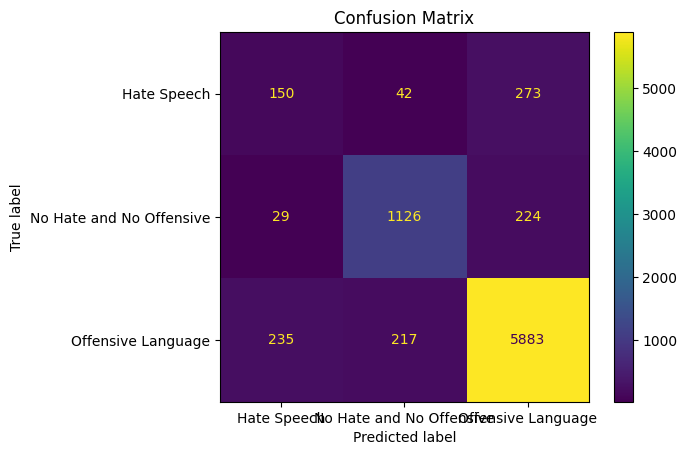

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Add model predictions
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", np.mean(y_pred == y_test))
#Classification Report
y_true = y_test
y_pred = clf.predict(X_test)

# Print classification report
print("-------------------------------------------------------------------------------------------------------")
print(classification_report(y_true, y_pred))
print("-------------------------------------------------------------------------------------------------------")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(include_values=True, cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()